In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [28]:
# Load Datasets #

df_s2 = pd.read_csv("../datasets/s2/abstract_title_null_analysis_2.csv",
                 true_values=["t"],
                 false_values=["f"])\
    .iloc[0:887]

df_oa = pd.read_csv("../datasets/openalex/oa_title_blank_analysis_fixed_delim.csv",
                    true_values=["t"],
                    false_values=["f"],
                   low_memory=False)\
    .iloc[:188144]

# Viz Colors #

tf_colors = ['forestgreen', 'tomato']

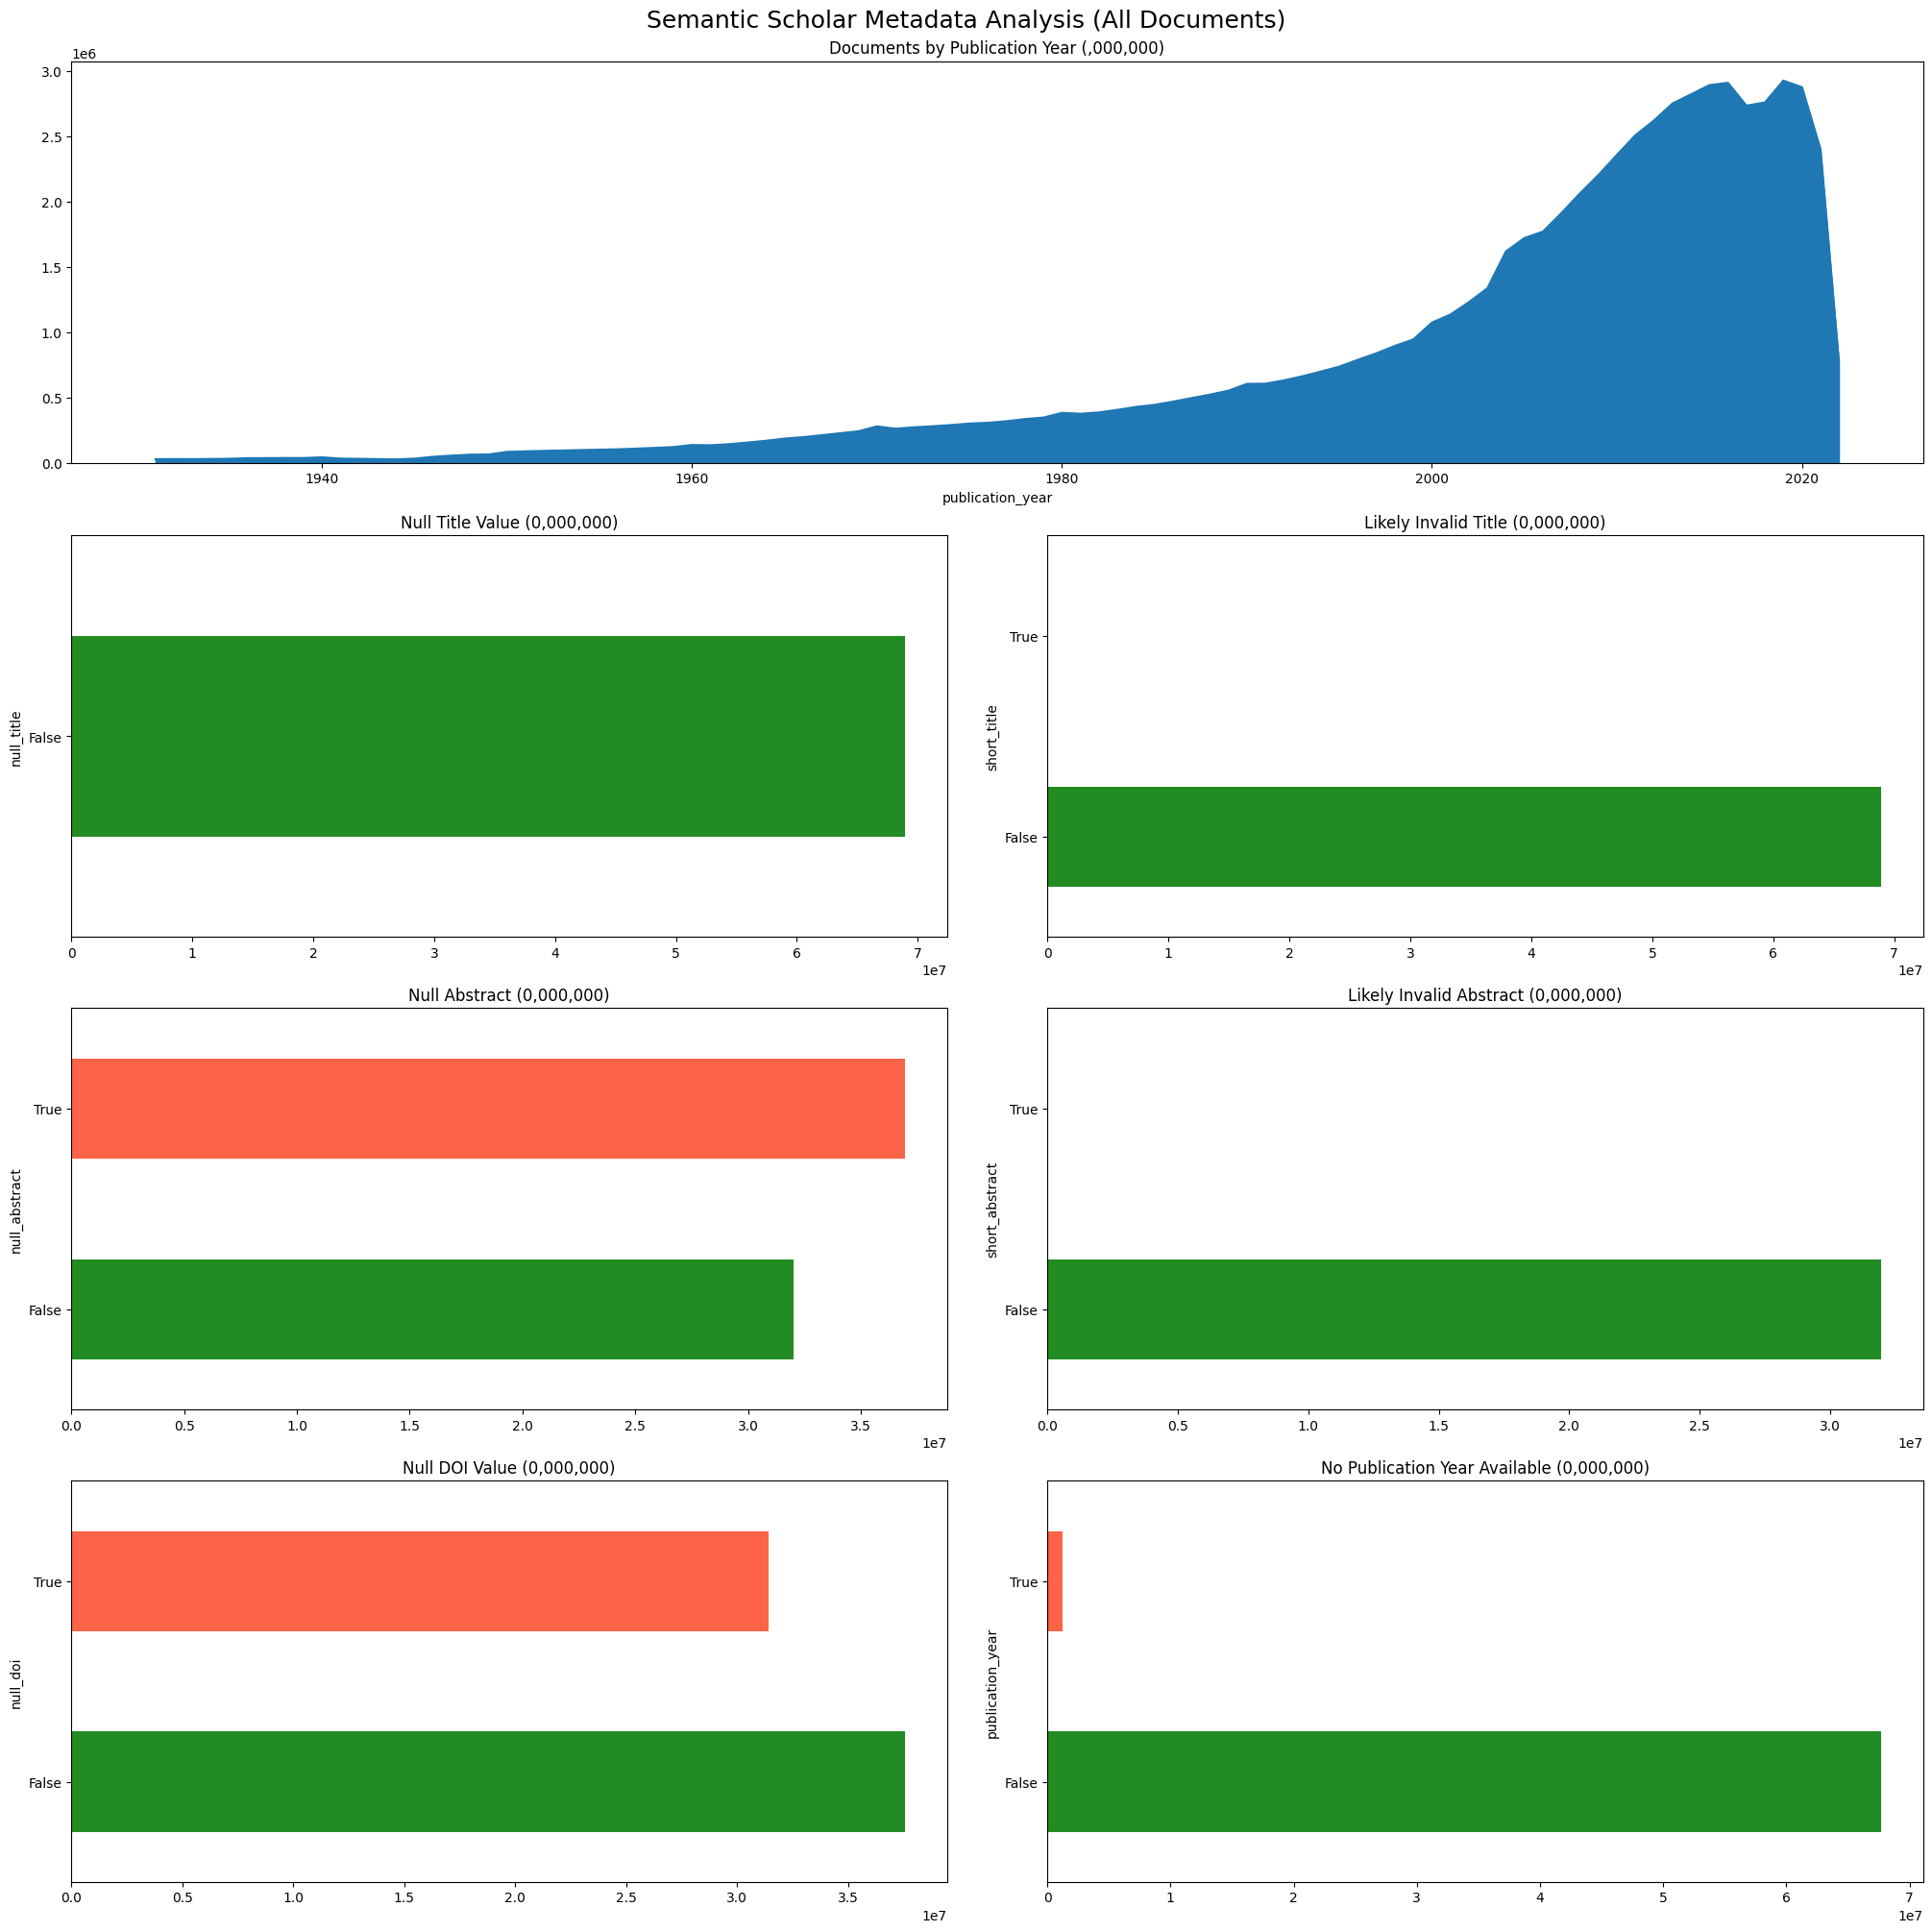

In [3]:
# Semantic Scholar Analysis #

fig = plt.figure(constrained_layout=True, figsize=[20,20])

gs = GridSpec(4, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])

fig.suptitle("Semantic Scholar Metadata Analysis (All Documents)", fontsize=18)

df_s2.groupby(df_s2["publication_year"].astype("float64"))["corpus_ids"].agg("sum").plot(kind="area", title="Documents by Publication Year (,000,000)", ax=ax1)
df_s2.groupby("null_title")["corpus_ids"].agg("sum").plot(kind="barh", title="Null Title Value (0,000,000)", color=tf_colors, ax=ax2)
df_s2.groupby("short_title")["corpus_ids"].agg("sum").plot(kind="barh", title="Likely Invalid Title (0,000,000)", color=tf_colors, ax=ax3)
df_s2.groupby("null_abstract")["corpus_ids"].agg("sum").plot(kind="barh", title="Null Abstract (0,000,000)", color=tf_colors, ax=ax4)
df_s2.groupby("short_abstract")["corpus_ids"].agg("sum").plot(kind="barh", title="Likely Invalid Abstract (0,000,000)", color=tf_colors, ax=ax5)
df_s2.groupby("null_doi")["corpus_ids"].agg("sum").plot(kind="barh", title="Null DOI Value (0,000,000)", color=tf_colors, ax=ax6)
df_s2.groupby(df_s2["publication_year"].isnull())["corpus_ids"].agg("sum").plot(kind="barh", title="No Publication Year Available (0,000,000)", color=tf_colors, ax=ax7)

plt.savefig("../local/viz/semanticscholar_metadata_analysis_all_documents.png", bbox_inches="tight")

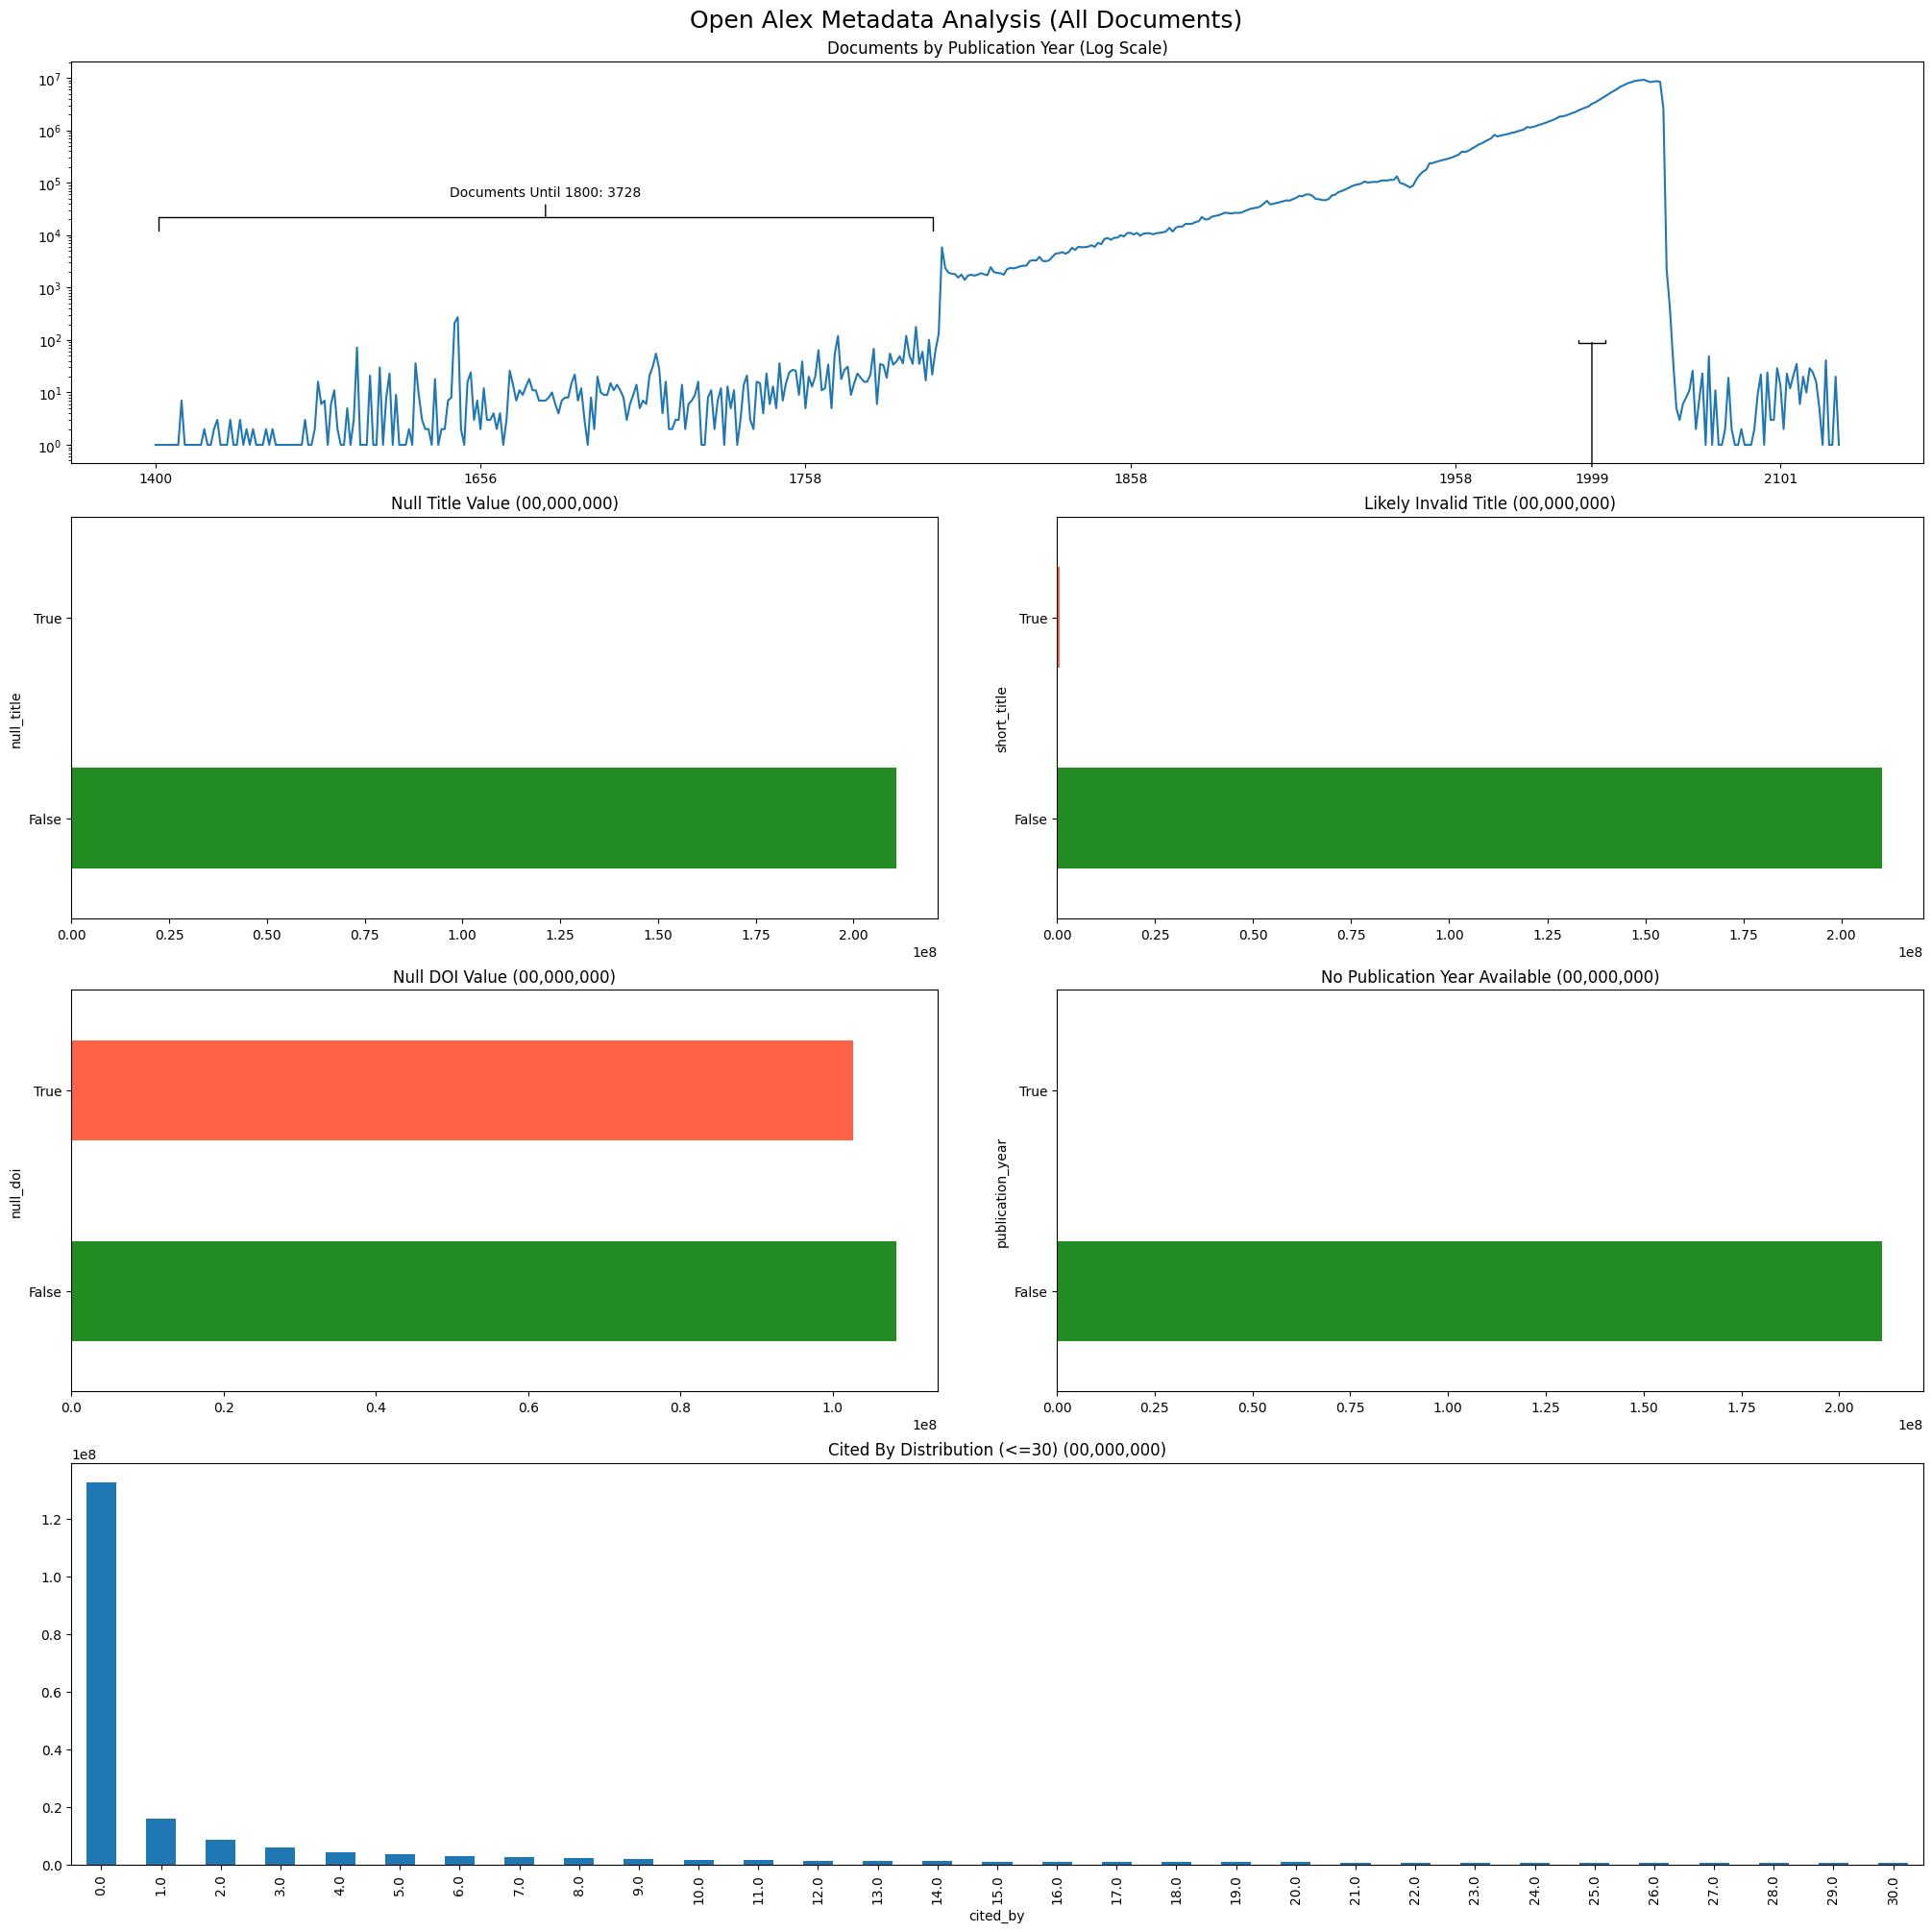

In [4]:
# Open Alex Analysis #

fig = plt.figure(constrained_layout=True, figsize=[20,20])

gs = GridSpec(4, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, :])

df_oa.groupby("publication_year")["documents"].agg("sum").plot(kind='line',logy=True, title="Documents by Publication Year (Log Scale)", xlabel='', ax=ax1)
df_oa.groupby("null_title")["documents"].agg("sum").plot(kind="barh", title="Null Title Value (00,000,000)", color=tf_colors, ax=ax2)
df_oa.groupby("short_title")["documents"].agg("sum").plot(kind="barh", title="Likely Invalid Title (00,000,000)", color=tf_colors, ax=ax3)
df_oa.groupby("null_doi")["documents"].agg("sum").plot(kind="barh", title="Null DOI Value (00,000,000)", color=tf_colors, ax=ax4)
df_oa.groupby(df_oa["publication_year"].isnull())["documents"].agg("sum").plot(kind="barh", title="No Publication Year Available (00,000,000)", color=tf_colors, ax=ax5)
df_oa.loc[df_oa["cited_by"] <= 30].groupby("cited_by")["documents"].agg("sum").plot(kind="bar", title="Cited By Distribution (<=30) (00,000,000)", ax=ax6)

ax1.annotate('1999',
            xy=(442, 100),
            xycoords='data',
            xytext=(0, -109), textcoords='offset points',
            arrowprops=dict(arrowstyle="-[", facecolor='black'),
            horizontalalignment='center',
            verticalalignment='bottom')

ax1.annotate('Documents Until 1800: 3728',
             xy=(120,20000),
             xycoords='data',
            xytext=(0,25), textcoords='offset points',
            arrowprops=dict(arrowstyle='-[, widthB=29, lengthB=1', facecolor='black'),
             horizontalalignment='center',
             verticalalignment='top')

fig.suptitle("Open Alex Metadata Analysis (All Documents)", fontsize=18)
plt.savefig("../local/viz/openalex_metadata_analysis_all_documents.png", bbox_inches="tight")